-> Regression algorithm used for classification problems. Binary classifier.

-> It estimates the probability that an instance belongs to a particular class. eg: probability that an email is a spam.

-> Estimated probability > threshold (typically 50%) => model predicts that instance belongs to the positive class labeled "1" otherwise negative class labeled "0".

-> It computes weighted sum of input features plus bias term. It outputs the logistic of this result. The logistic (sigma) is a sigmoid function ie S shaped that outputs a number between 0 and 1. The sigmoid function transforms the continuous real number into a range of ( 0 , 1 )

sigma(t) = 1/(1+e^-t)

p_hat=sigma(theta_transpose X)

y_hat= 0 if p_hat < 0.5 else 1

sigma(t) < 0.5 when t < 0 ; sigma(t) >= 0.5 when t >= 0 . With threshold=50% probability. model predicts 1 if (theta_transpose X) is positive, predicts 0 if its negative.

logit(p) (also called log-odds) = log(p/(1-p)) => inverse of logistic function => log of ratio of estimated prob of positive class by estimated prob of negative class.

Computing logit of estimated probability p will give you t

Objective of training is to set the parameter vector theta so that model estimates high probabilities for positive instances, y=1 and low probabilities for negative instances , y=0

**Cost function for a single instance:**

c(theta) = -log(p_hat) if y=1 ; -log(1-p_hat) if y=0

-log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance and it will also be large if it estimates a prob close to 1 for negative instance.

Cost function over the whole training set is the average cost over all training instances.(log loss). Cost function is convex. So GD is guaranteed to find the global minima. No closed form equation to compute cost function.

J(theta) = -1/m sigma i=1 to m (yi log(p_hat i) + (1-yi) log(1-p_hat i))

In [ ]:
## Iris dataset - It contains sepal and petal length and width of 150 iris flowers of 3 different species - Iris Setosa, Iris versicolor, Iris virginica

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

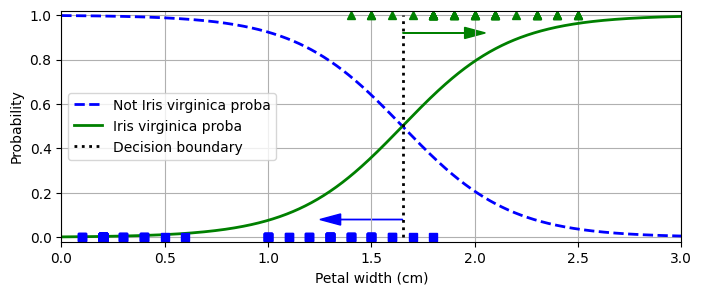

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

Hyperprameter controlling the regularization stength is inverse of alpha ie C. Higher the value of C the less model is regularized. Logistic regression models can be regularized using l1 or l2 penalties. Scikit-Learn adds an l2 penalty by default.

# Softmax Regression (Multinomial Logistic Regression)

To support multiple classes without training multiple binary classifiers.

When given an instance x, the softmax regression model first computes a score
 sk(x) for each class k then estimates the probability of each class by applying the softmax function to the scores.

 It predicts only one class at a time. Should be used only with mutually exclusive classes like different species of plants. Cannot use it to recognize multiple people in a picture.

 Objective of training is to have a model that estimates high probability for the target class and low probability for the other classes. Cost function is called cross entropy. It penalizes the model when it estimates low probability for a target class.

 We've cost function for entire training set. We compute gradient vector of this cost function for every class. Then use gradient descent (or any optimization algorithm) to find the parameter matrix that minimizes the cost function.

 Scikit-Learn's LogisticRegression uses softmax regression automatically when we train it on more than 2 classes.

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])